# K Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("snsdata.csv")

In [4]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## EDA

In [5]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [6]:
data["gender"].value_counts(dropna= False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [7]:
# fill the null value by "Not disclosed

In [8]:
data["gender"].fillna("not disclosed", inplace = True)

In [9]:
data["gender"].value_counts(dropna= False)

F                22054
M                 5222
not disclosed     2724
Name: gender, dtype: int64

In [10]:
data.groupby("gradyear")["age"].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [11]:
data["age"] = data.groupby("gradyear").transform(lambda x : x.fillna(x.mean()))

In [12]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [13]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.982148,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.169862,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.504000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.443000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.391459,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [14]:
# Handling Outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


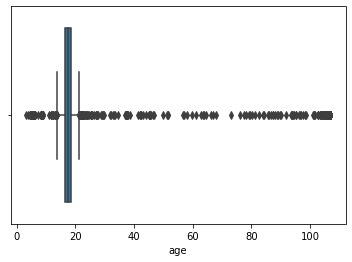

In [15]:
sns.boxplot(data["age"]);

In [16]:
q1 = data["age"].quantile(0.25)
q3 = data["age"].quantile(0.75)

In [17]:
iqr = q3-q1

In [18]:
iqr

1.887459224069687

In [19]:
df = data[(data["age"]>(q1-1.5*iqr)) & (data["age"]<(q3+1.5*iqr))]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

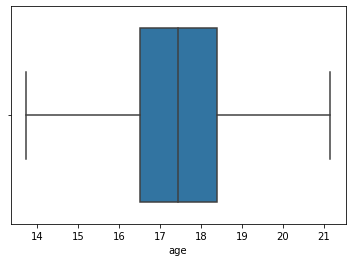

In [20]:
sns.boxplot(df["age"])

In [21]:
df["age"].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

In [22]:
#Standardizing the data 

In [23]:
names = df.columns[4:40]
scaled_features = df.copy()
features = scaled_features[names]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)
features =scaler.transform(features.values)
scaled_features[names] = features
scaled_features.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
1,2006,F,18.801,0,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,1.063874,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
2,2006,M,18.335,69,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,2.020691,-0.220556,-0.177494
3,2006,F,18.875,0,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
4,2006,not disclosed,18.995,10,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,2.264470,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,2.280682,2.782377


In [24]:
# label encoder ( convert object variable into numeric)

In [25]:
def gendre_to_numeric(x):
    if x == "M":
        return 1
    if x == "F" :
        return 2
    if x == "not disclosed":
        return 3

In [26]:
scaled_features["gender"]= scaled_features["gender"].apply(gendre_to_numeric)

In [27]:
scaled_features["gender"].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [28]:
# Building the k means model

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 1234)
model = kmeans.fit(scaled_features)

In [30]:
# Elbow method
#help(KMeans)

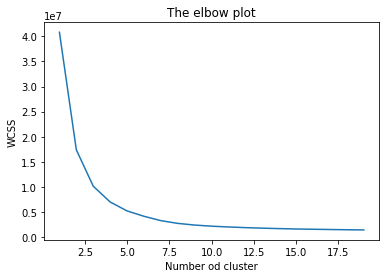

In [31]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = "k-means++",max_iter = 1000, n_init= 10, random_state = 1234)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The elbow plot")
plt.xlabel("Number od cluster")
plt.ylabel("WCSS")
plt.show()

In [32]:
# fit K-means cluster for K= 5

In [33]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_features)

KMeans(n_clusters=5)

In [34]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [35]:
df["cluster"] = kmeans.labels_

<ipython-input-35-0cfa3f8ae50d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = kmeans.labels_


In [36]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
count,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,...,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000,29633.000000
mean,2007.498498,17.377469,30.239227,0.268316,0.253737,0.222758,0.162353,0.143590,0.134647,0.107549,...,0.258259,0.354875,0.149158,0.070091,0.051429,0.184085,0.114669,0.088179,0.059967,0.947626
std,1.117976,1.147764,36.586961,0.806536,0.706848,0.918422,0.742582,0.641337,0.517863,0.516933,...,0.697219,0.726507,0.473898,0.347751,0.280510,0.625750,0.438140,0.399809,0.337858,1.091098
min,2006.000000,13.719000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,16.501000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,17.426000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2008.000000,18.387000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2009.000000,21.158000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,...,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000,4.000000


In [37]:
# Clustering interpretation


In [38]:
plt.figure(figsize = (12,6))
axis = sns.barplot(x = np.arange(0,5,1), y = list(df.groupby(["cluster"]).count()["age"].values)

SyntaxError: unexpected EOF while parsing (<ipython-input-38-f4f96bb13b5c>, line 2)

In [ ]:
names = df.columns[5:40]

In [ ]:
names

In [ ]:
list(df.groupby(["cluster"]).count()["age"].values)

In [ ]:
df.groupby(["cluster"]).mean()[names]

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_features
pred = kmeans.fit_predict(scaled_features)
centers = kmeans.cluster_centers_
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features,pred)
score